In [44]:
#importing the necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [28]:
#Define the data directory
data_dir = '/content/drive/MyDrive/Shells-Pebbles dataset'

In [29]:
#Define the subdirectories for shells and pebbles
shells_dir = os.path.join(data_dir, 'shells')
pebbles_dir = os.path.join(data_dir, 'pebbles')

In [30]:
#Define constants
IMG_WIDTH, IMG_HEIGHT = 150, 150
batch_size = 32

In [31]:
#Create ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  #normalize pixel values to [0,1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  #split data into train and validation sets
)


In [32]:

#Load images from the directories, apply rescaling, and split into training and validation sets
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=batch_size,
    class_mode='binary',  
    subset='training' 
)

Found 176 images belonging to 2 classes.


In [33]:
#Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [34]:
#Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
#Function to predict and classify an image
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  #Create batch dimension
    predictions = model.predict(img_array)
    if predictions[0][0] > 0.5:
        print("A shell is detected.")
    else:
        print("A pebble is detected.")


1/1 [==============================] - 0s 36ms/step
A pebble is detected.


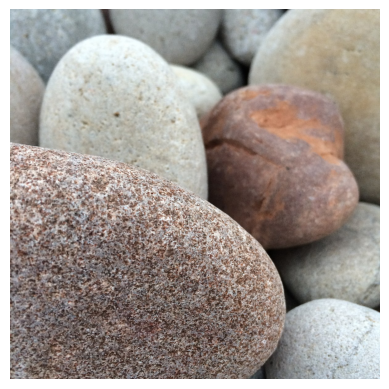

In [45]:
image_path = '/content/Pebble_Dash_(15366562092).jpg'
predict_image(image_path)
#Load the image
image = mpimg.imread(image_path)

#Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()